### Machine Learning Tutorial using Support Vector Machine (SVM) for Wine Classification

### 1. Load the Necessary Libraries

In [22]:
# Load the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### 2. Load the wine dataset and display the 1st five rows

In [23]:


# Load the wine dataset
file_path_wine_new = '/content/wine_dataset.csv'
wine_data = pd.read_csv(file_path_wine_new)

# Display the first few rows of the dataset
wine_data.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### 3. Exploring and Understanding the data

In [24]:
# Basic information about the dataset

wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [25]:
# Summary statistics

wine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [26]:
# Check for missing values

wine_data.isnull().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


In [27]:
# Check for duplicates

wine_data.duplicated().sum()

np.int64(1177)

### 4. Data Preprocessing

In [28]:
# Remove duplicates

wine_data = wine_data.drop_duplicates()


In [29]:
# Confirm if duplicates are removed

wine_data.duplicated().sum()

np.int64(0)

In [30]:


# Separate features and target variable
X = wine_data.drop(columns=['quality', 'style'])  # Dropping 'quality' and 'style' as target variables
y = wine_data['quality']  # Using 'quality' as the target variable

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


### 5. Model Training and Evaluation with Different Kernels

In [31]:


# Train SVM with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = svm_linear.predict(X_test)

# Evaluate the model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear Kernel Accuracy: {accuracy_linear * 100:.2f}%")


Linear Kernel Accuracy: 52.19%


In [32]:
# Train SVM with a polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)

# Predict on the test set
y_pred_poly = svm_poly.predict(X_test)

# Evaluate the model
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Polynomial Kernel Accuracy: {accuracy_poly * 100:.2f}%")


Polynomial Kernel Accuracy: 53.20%


In [33]:
# Train SVM with an RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale')
svm_rbf.fit(X_train, y_train)

# Predict on the test set
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Kernel Accuracy: {accuracy_rbf * 100:.2f}%")


RBF Kernel Accuracy: 55.14%


### 6. Visualizing Decision Boundaries

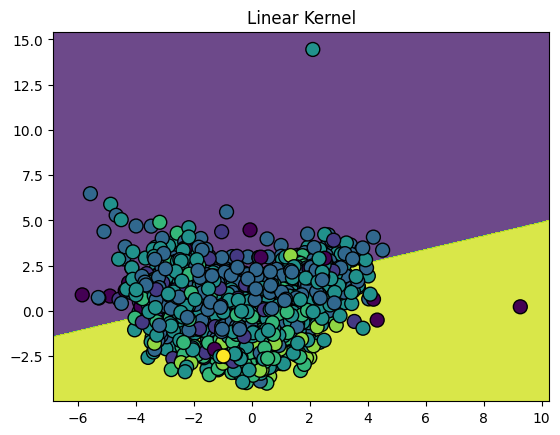

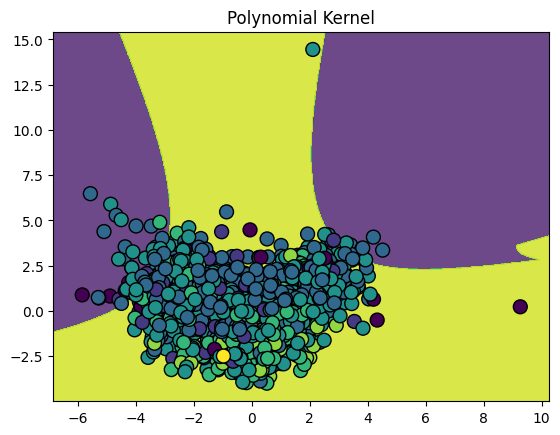

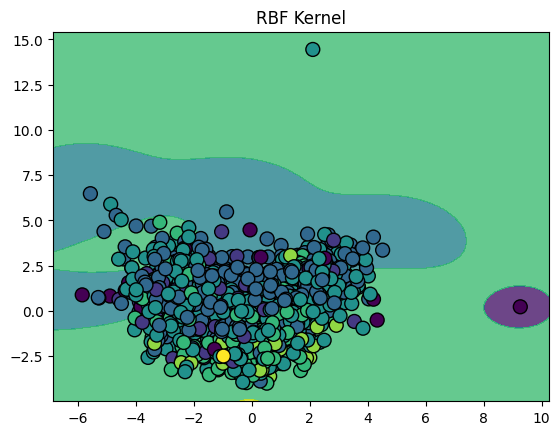

In [34]:

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
    plt.title(title)
    plt.show()

# Apply PCA to reduce the data to 2D
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)

# Train the models using the 2D PCA-transformed data
svm_linear.fit(X_train_2D, y_train)
svm_poly.fit(X_train_2D, y_train)
svm_rbf.fit(X_train_2D, y_train)

# Plot decision boundaries for each kernel using the 2D PCA-transformed data
plot_decision_boundary(X_train_2D, y_train, svm_linear, "Linear Kernel")
plot_decision_boundary(X_train_2D, y_train, svm_poly, "Polynomial Kernel")
plot_decision_boundary(X_train_2D, y_train, svm_rbf, "RBF Kernel")
